<a href="https://colab.research.google.com/github/itssofiarce/MINERIA/blob/main/tp3_mineria_2024_arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce

# Preparacion del entorno

In [1]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/MINERIA.git
  os.chdir(REPO_NAME)

Cloning into 'MINERIA'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 83 (delta 22), reused 15 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 6.79 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (22/22), done.


# Librerías


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Exploratorio


In [3]:
df = pd.read_csv('/content/MINERIA/tp3_2024/dxWeather.csv')

In [4]:
df.head()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica,Localizacion,TipoClima,Estacion
0,39,96,8.5,71,1011.43,Llanura,Nublado,Primavera
1,30,64,7.0,16,1018.72,Montania,Soleado,Primavera
2,38,83,1.5,82,1026.25,Costa,Soleado,Primavera
3,32,55,3.5,26,1010.03,Llanura,Nublado,Verano
4,3,85,6.0,96,984.46,Llanura,Nevado,Invierno


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         10090 non-null  int64  
 1   Humedad             10090 non-null  int64  
 2   VientoVelocidad     10090 non-null  float64
 3   Precipitation       10090 non-null  int64  
 4   PresionAtmosferica  10090 non-null  float64
 5   Localizacion        10090 non-null  object 
 6   TipoClima           10090 non-null  object 
 7   Estacion            10090 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 630.8+ KB


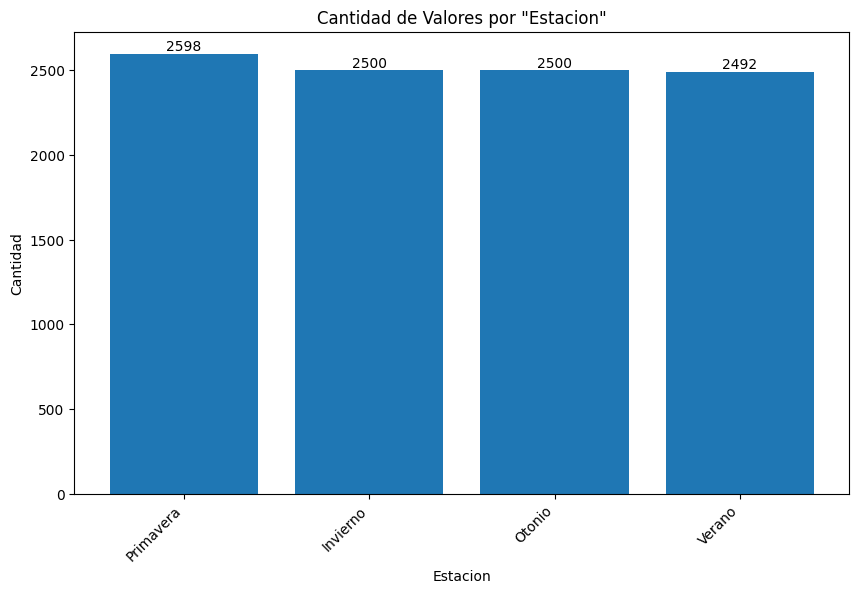

In [6]:
# Conteo de variable muestras con las categorias de las variables a predecir
conteo = df['Estacion'].value_counts()

plt.figure(figsize=(10, 6))
grafico = plt.bar(conteo.index, conteo.values)

plt.xlabel('Estacion')
plt.ylabel('Cantidad')
plt.title('Cantidad de Valores por "Estacion"')
plt.xticks(rotation=45, ha='right')

for bar in grafico:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}', ha='center', va='bottom', fontsize=10)


plt.show()

Hay un leve desbalanceo en las clases, predominanado la de primavera. Sin embargo, al representar menos del 10% del conjunto el total de la diferencia entre la clase primavera y verano que menos tiene, voy a continuar sin balancear las clases.

In [7]:
df.describe()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000
mean,21.872349,67.195045,9.634936,50.796333,1007.685836
std,16.426722,20.463797,6.795890,32.333798,38.763971
min,-24.000000,20.000000,0.000000,0.000000,800.230000
25%,13.000000,55.000000,5.000000,18.000000,998.570000
50%,23.000000,69.000000,8.500000,53.000000,1010.315000
75%,32.000000,81.000000,13.500000,80.000000,1017.820000
max,109.000000,109.000000,47.500000,109.000000,1199.210000


### Distribución de las variables numéricas agrupadas por estación



<ipython-input-8-b8b65ad15787>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-8-b8b65ad15787>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-8-b8b65ad15787>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-8-b8b65ad15787>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-8-b8b65ad15787>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
<ipython-input-8-b8b65ad1

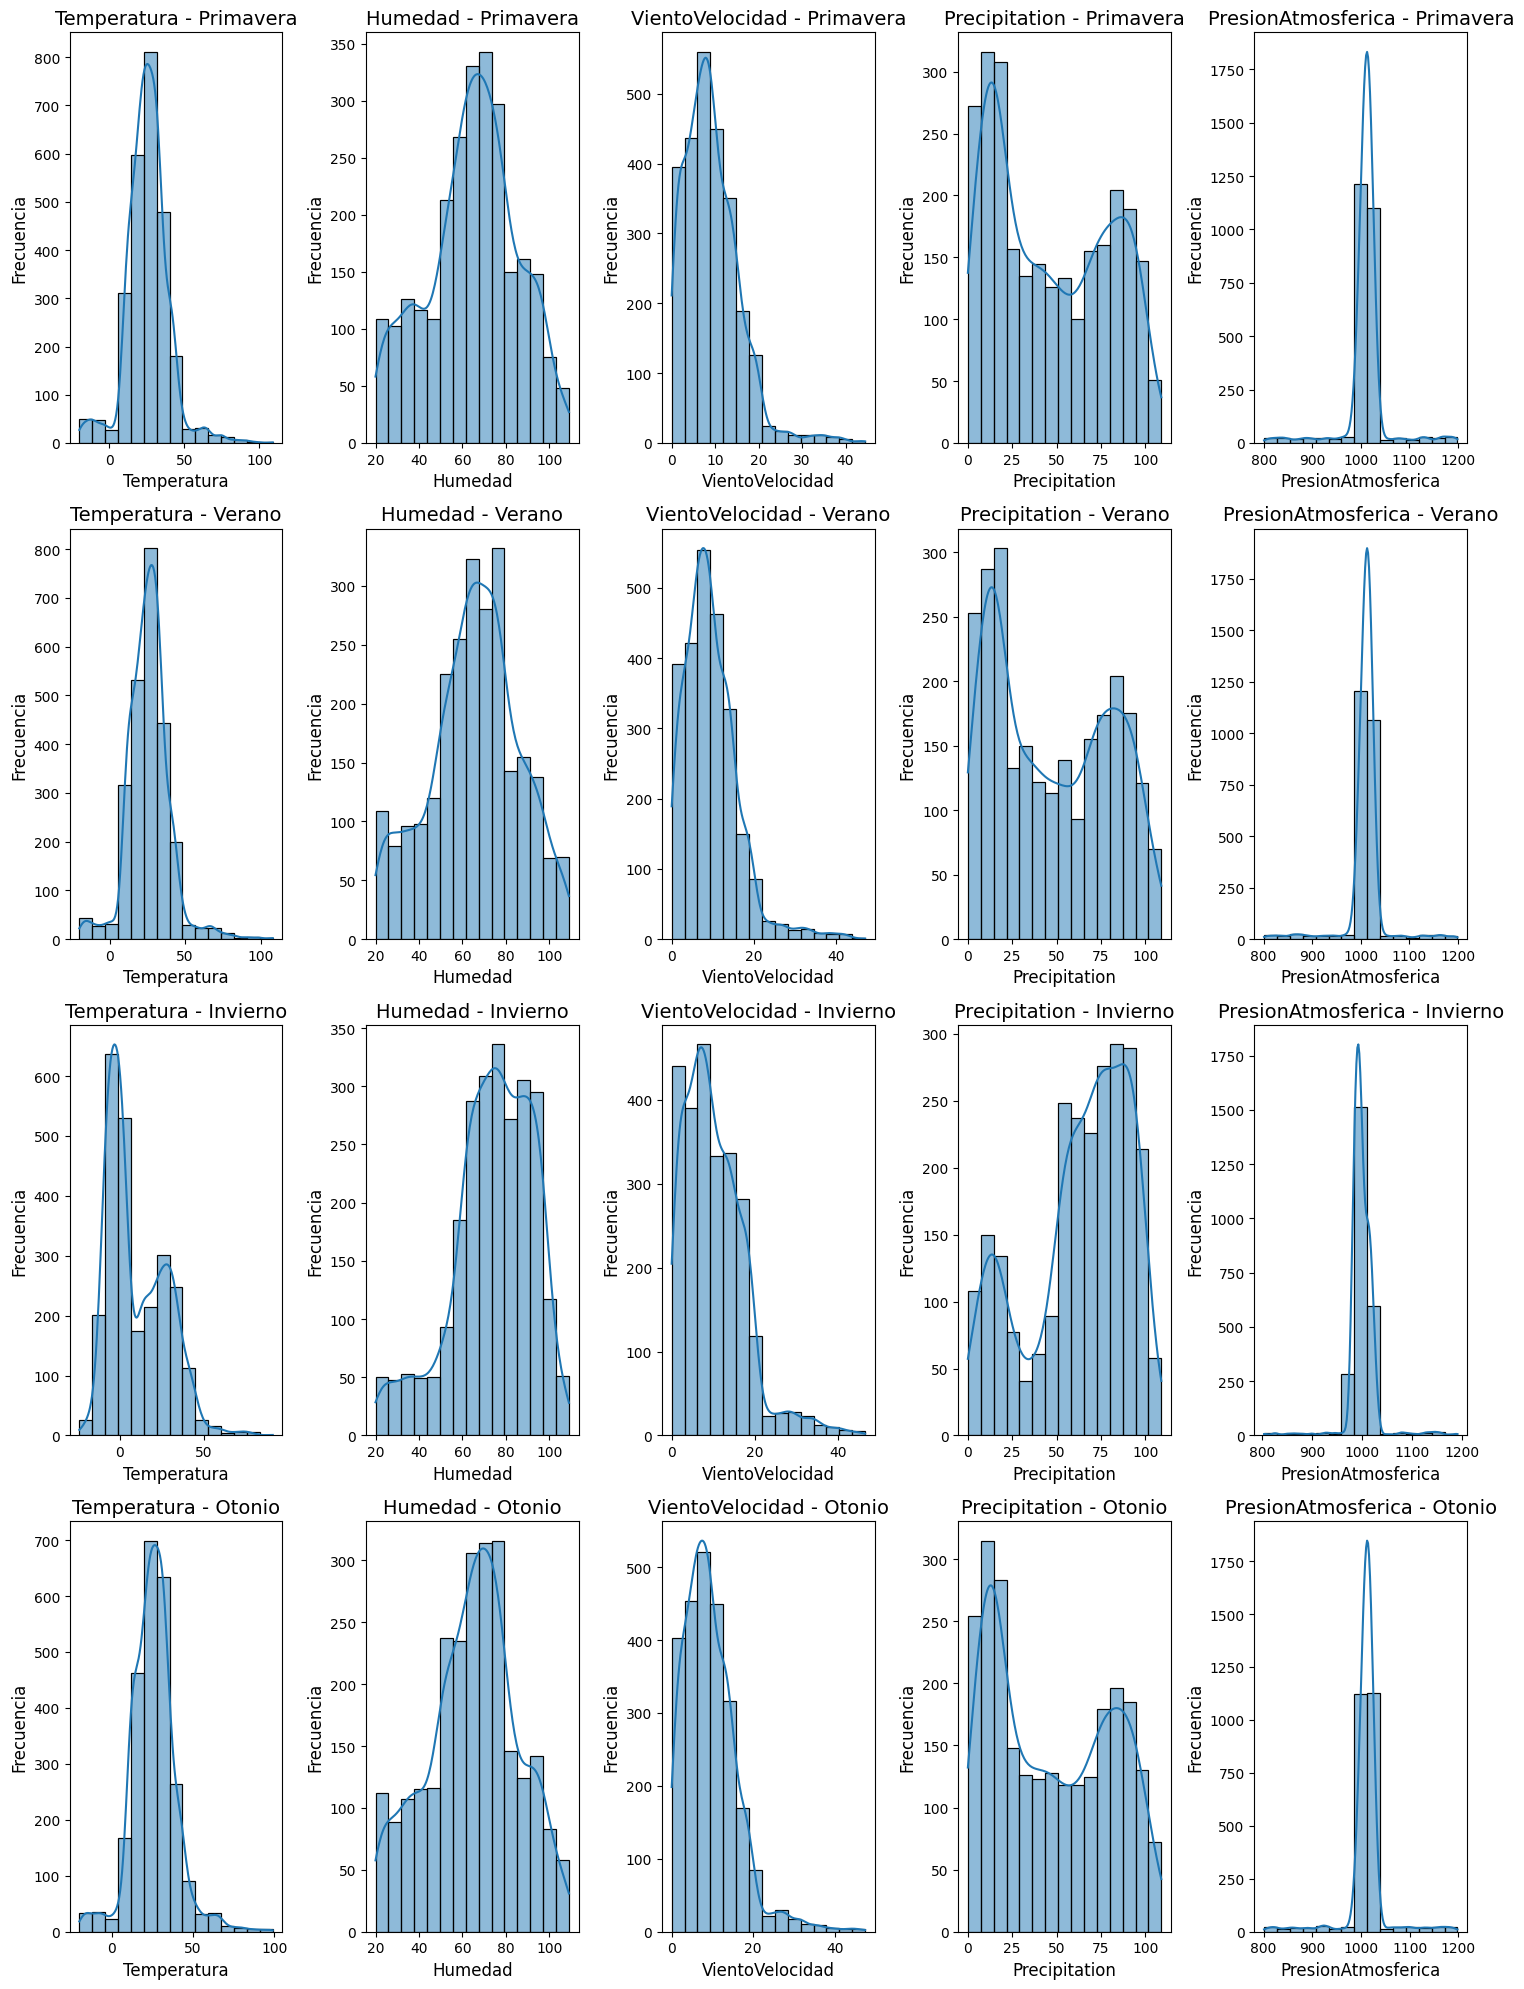

In [8]:
columns_to_plot = ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation', 'PresionAtmosferica']
stations = df['Estacion'].unique()

fig, axes = plt.subplots(nrows=len(stations) , ncols=len(columns_to_plot), figsize=(15, 5*len(stations) ))
axes = axes.flatten()

# Histogramas para cada estación
for row, station in enumerate(stations):
    station_data = df[df['Estacion'] == station]

    for col, var in enumerate(columns_to_plot):
        ax = axes[row * len(columns_to_plot) + col]
        # Hstograma para una estación y variable
        sns.histplot(data=station_data, x=var, kde=True, bins=15, palette='Set2', ax=ax)
        ax.set_title(f'{var} - {station}', fontsize=14)
        ax.set_xlabel(var, fontsize=12)
        ax.set_ylabel('Frecuencia', fontsize=12)


# Mostrar el gráfico
plt.tight_layout()
plt.show()


No se observan valores atípos de las variables según las estaciones.


Temperatura	Humedad	VientoVelocidad	Precipitation	PresionAtmosferica	Localizacion	TipoClima	Estacion

In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

df['TipoClima']=le.fit_transform(df[['TipoClima']])
df['Localizacion']=le.fit_transform(df[['Localizacion']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
X = df.drop(['Estacion'],axis= 1)
y = df['Estacion']

<Axes: >

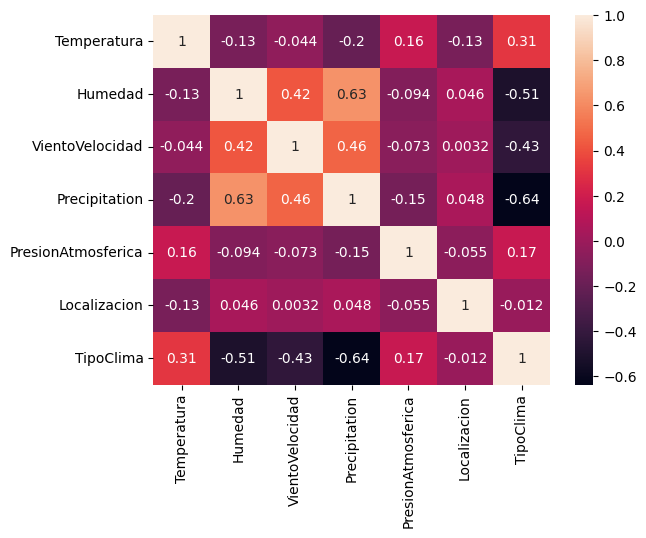

In [11]:
sns.heatmap(X.corr(),annot=True)

Las variables con mayor correlación positiva son las de precipitación y humedad con un 0.63.

# Predicción de Estación


Librerías para la construcción de modelos

In [44]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Modelo
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Validación Cruzada
from sklearn.model_selection import cross_val_score

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size= .25 )

## SVM - Kernel Lineal
K = 5

In [14]:
clf = SVC(kernel='linear', random_state=123)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [15]:
# Matriz de confusion
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

    Invierno       0.66      0.54      0.60       772
      Otonio       0.18      0.29      0.22       372
   Primavera       0.60      0.31      0.41      1289
      Verano       0.03      0.22      0.06        90

    accuracy                           0.38      2523
   macro avg       0.37      0.34      0.32      2523
weighted avg       0.54      0.38      0.43      2523



Sin estandarizar los datos se obtiene una accuracy muy baja del 35%. En cuanto a la precisión es mas "preciso" para las muestras de las clases de Invierno y menos preciso para las de Verano. En cuanto al recall, el modelo idenitifica correctamente el 48% de las instancias reales de Invierno mientras que para las de verano son solamente el 26%. El f1-score para invierno del 54% me indica que hay un balance en precisión y recall pero que no logra en general una buena predicción para las instancias  de Invierno. Una primera sospecha del bajo rendimiento de verano es que era la clase de menor cantidad de muestras aunque esa diferencia no era significativa y otra sospecha de la baja accuracy puede ser la falta de estandarización de los datos. Por lo que estandarizaré los datos y según la documentación oficial de sckit learn como las clases estan desbalanceadas agregaré: *class_weight='balanced'* y compararé los nuevos resultados con los estos.


In [16]:
clf_1 = make_pipeline(StandardScaler(), SVC(C = 0.05, kernel='linear', class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

clf_1.fit(X_train, y_train)
y_pred_1 = clf_1.predict(X_test)

[LibSVM]

In [17]:
scores = cross_val_score(clf_1, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.36372646 0.37363726 0.37710605 0.36769078 0.36719524]


In [18]:
# Matriz de confusion
print(classification_report(y_pred_1,y_test))

              precision    recall  f1-score   support

    Invierno       0.61      0.67      0.64       581
      Otonio       0.25      0.27      0.26       573
   Primavera       0.25      0.28      0.26       589
      Verano       0.35      0.27      0.31       780

    accuracy                           0.37      2523
   macro avg       0.37      0.37      0.37      2523
weighted avg       0.36      0.37      0.36      2523



Mejora en un 1 punto el accuracy general y aumenta en 9 puntos la precisión de verano que era la que menos precisión tenía en el modelo anterior. Sin embargo redujo el accuracy para las instancias de Invierno y Primavera.

In [19]:
clf_2 = make_pipeline(StandardScaler(), SVC(C = 0.5, kernel='linear', class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

clf_2.fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)

[LibSVM]

In [20]:
scores = cross_val_score(clf_2, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.36521308 0.37661051 0.37710605 0.36273538 0.37016848]


In [21]:
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

    Invierno       0.62      0.67      0.64       582
      Otonio       0.26      0.28      0.27       584
   Primavera       0.25      0.28      0.26       581
      Verano       0.35      0.27      0.31       776

    accuracy                           0.37      2523
   macro avg       0.37      0.38      0.37      2523
weighted avg       0.37      0.37      0.37      2523



Al aumentar el valor del paramentro de regularización C la precisión para la clase de verano mejora en 8 puntos comparado con el anterior. Los resultados de la validación cruzada, dan entre 0.36 y 0.37 po

In [22]:
# Matriz para ver vp vn fp y vn
y_true = y_test
y_pred = y_pred_2
cm = confusion_matrix(y_true, y_pred)

In [23]:
print(cm)

[[392  69  74 101]
 [ 63 161 174 217]
 [ 70 185 163 246]
 [ 57 169 170 212]]


Continuaré por comparar en Kernel Gaussiano

## SVM - Kernel Gaussiano

In [24]:
gauss_0 = make_pipeline(StandardScaler(), SVC(C = 0.5, gamma= 0.05,kernel='rbf', class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

gauss_0.fit(X_train, y_train)
y_pred_gauss_0 = gauss_0.predict(X_test)

[LibSVM]

In [25]:
scores = cross_val_score(gauss_0, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.37809713 0.38156591 0.37809713 0.39197225 0.37561943]


In [26]:
print(classification_report(y_pred_gauss_0,y_test))

              precision    recall  f1-score   support

    Invierno       0.57      0.92      0.70       392
      Otonio       0.41      0.30      0.35       841
   Primavera       0.28      0.31      0.29       591
      Verano       0.34      0.30      0.32       699

    accuracy                           0.40      2523
   macro avg       0.40      0.46      0.42      2523
weighted avg       0.39      0.40      0.38      2523



In [27]:
gauss_1 = make_pipeline(StandardScaler(), SVC(C = 1,kernel='rbf', class_weight='balanced', verbose=True, decision_function_shape='ovo', random_state=123))

gauss_1.fit(X_train, y_train)
y_pred_gauss_1 = gauss_1.predict(X_test)

[LibSVM]

In [28]:
scores = cross_val_score(gauss_1, X, y, cv=5)
print(scores)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.38107037 0.38701685 0.37066402 0.39345887 0.37859267]


In [29]:
print(classification_report(y_pred_gauss_1,y_test))

              precision    recall  f1-score   support

    Invierno       0.56      0.99      0.72       361
      Otonio       0.35      0.29      0.32       753
   Primavera       0.23      0.30      0.26       492
      Verano       0.44      0.29      0.35       917

    accuracy                           0.39      2523
   macro avg       0.40      0.47      0.41      2523
weighted avg       0.39      0.39      0.38      2523



## Random Forest
K = 5

Hiperparametros:
- n_estimators
- max_feaures
- bootstrp
- max_samples
- min_samples
- max_search




In [30]:
rf_1 = RandomForestClassifier(n_estimators=50, bootstrap=True, max_features=None, max_samples=.9, max_depth=4, min_samples_leaf=9,random_state=123)

rf_1.fit(X_train, y_train)
y_pred_rf_1 = rf_1.predict(X_test)

In [31]:
print(classification_report(y_pred_rf_1,y_test))

              precision    recall  f1-score   support

    Invierno       0.55      0.97      0.70       362
      Otonio       0.22      0.26      0.24       516
   Primavera       0.47      0.31      0.37      1006
      Verano       0.29      0.28      0.29       639

    accuracy                           0.39      2523
   macro avg       0.38      0.45      0.40      2523
weighted avg       0.38      0.39      0.37      2523



### Pesos de las características

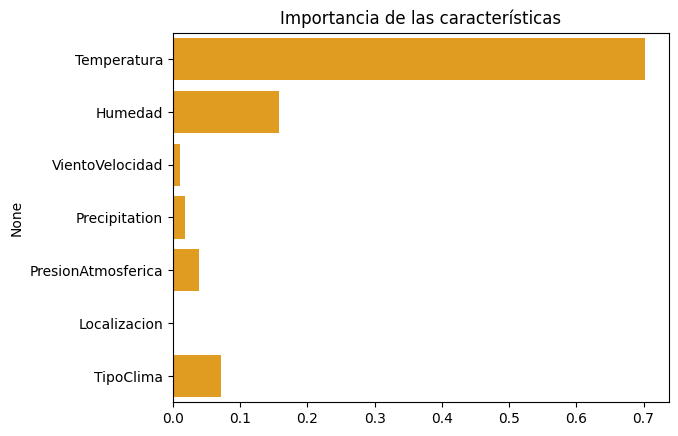

In [32]:
sns.barplot(x=rf_1.feature_importances_, y=X.columns, color='orange')
plt.title('Importancia de las características')
plt.show()

Las variables con mas peso sobre ls decisión de los arboles son la temperatura, seguido de la humedad y tipo clima.

# Conclusión:


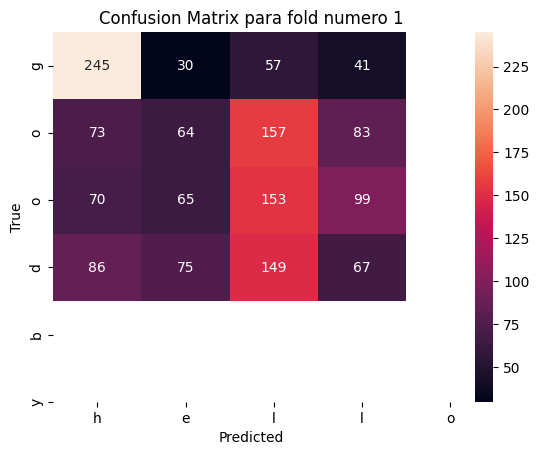

Classification Report para fold numero 1:
               precision    recall  f1-score   support

    Invierno       0.52      0.66      0.58       373
      Otonio       0.27      0.17      0.21       377
   Primavera       0.30      0.40      0.34       387
      Verano       0.23      0.18      0.20       377

    accuracy                           0.35      1514
   macro avg       0.33      0.35      0.33      1514
weighted avg       0.33      0.35      0.33      1514



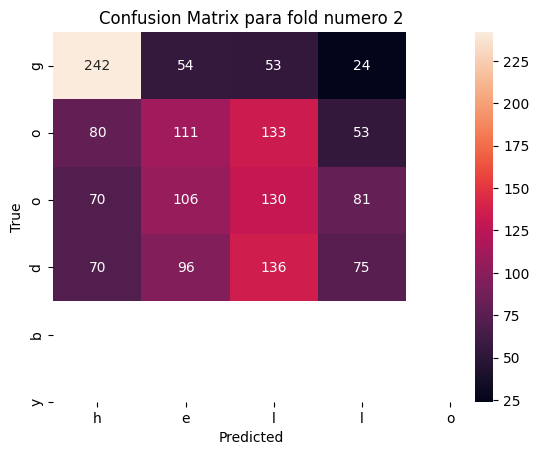

Classification Report para fold numero 2:
               precision    recall  f1-score   support

    Invierno       0.52      0.65      0.58       373
      Otonio       0.30      0.29      0.30       377
   Primavera       0.29      0.34      0.31       387
      Verano       0.32      0.20      0.25       377

    accuracy                           0.37      1514
   macro avg       0.36      0.37      0.36      1514
weighted avg       0.36      0.37      0.36      1514



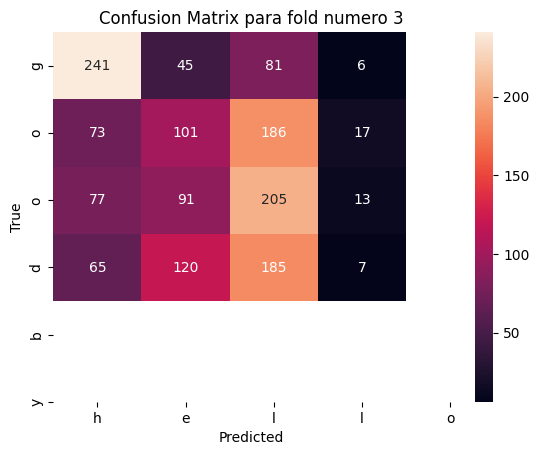

Classification Report para fold numero 3:
               precision    recall  f1-score   support

    Invierno       0.53      0.65      0.58       373
      Otonio       0.28      0.27      0.28       377
   Primavera       0.31      0.53      0.39       386
      Verano       0.16      0.02      0.03       377

    accuracy                           0.37      1513
   macro avg       0.32      0.37      0.32      1513
weighted avg       0.32      0.37      0.32      1513



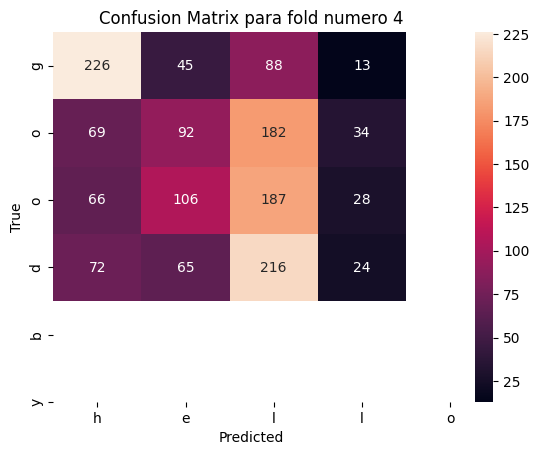

Classification Report para fold numero 4:
               precision    recall  f1-score   support

    Invierno       0.52      0.61      0.56       372
      Otonio       0.30      0.24      0.27       377
   Primavera       0.28      0.48      0.35       387
      Verano       0.24      0.06      0.10       377

    accuracy                           0.35      1513
   macro avg       0.34      0.35      0.32      1513
weighted avg       0.33      0.35      0.32      1513



KeyboardInterrupt: 

In [47]:
# Cross Validation de los mejores resultados de los tres modelos
!pip install seaborn scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cross_val(model_name):
    global fold  # Declare fold as global to modify its value inside the function
    fold = 1  # Initialize fold to 1 for each model
    for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):

        #evitar el error out of index
        index_labels = y_train.index
        trainsc_df = pd.DataFrame(X_train, index=index_labels)


        X_train_fold, X_val_fold = trainsc_df.iloc[train_index], trainsc_df.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model on the training fold
        model_name.fit(X_train_fold, y_train_fold)

        # Predict on the validation fold
        y_pred_fold = model_name.predict(X_val_fold)

        # Compute confusion matrix and classification report
        cm = confusion_matrix(y_val_fold, y_pred_fold)
        # Matriz de confusion x cada fold
        sns.heatmap(cm, xticklabels="hello", yticklabels="goodby", annot=True, fmt='g')
        plt.title(f"Confusion Matrix para fold numero {fold}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print classification report
        print(f"Classification Report para fold numero {fold}:\n", classification_report(y_val_fold, y_pred_fold))

        fold += 1

cross_val(clf)
cross_val(gauss_0)
cross_val(rf_1)